In [1]:
import pandas as pd
import os

In [2]:
files = [file for file in os.listdir("./Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("./Sales_Data/all_data.csv", index=False)


In [3]:
all_data_df = pd.read_csv("./Sales_Data/all_data.csv")
all_data_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [4]:
# all_data_df = all_data_df.drop("Unnamed: 0", axis=1)

In [5]:
nan_df = all_data_df[all_data_df.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
all_data_df = all_data_df.dropna(how='all')

In [7]:
all_data_df = all_data_df[all_data_df["Order Date"].str[0:2] != "Or"]

In [8]:
all_data_df["Month"] = all_data_df["Order Date"].str[0:2]
all_data_df["Month"] = all_data_df["Month"].astype("int32")
all_data_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [9]:
all_data_df["Quantity Ordered"] = all_data_df["Quantity Ordered"].astype("int32")
all_data_df["Price Each"] = all_data_df["Price Each"].astype("float")
all_data_df["Sales"] = all_data_df["Quantity Ordered"]*all_data_df["Price Each"]

In [10]:
by_month_total_sales_df = all_data_df.groupby("Month")["Sales"].sum()
by_month_total_sales_df = by_month_total_sales_df.reset_index()
by_month_total_sales_df.loc[by_month_total_sales_df["Sales"] == by_month_total_sales_df["Sales"].max()]

,Month,Sales
11,12,4613443.34


In [11]:
by_month_total_sales_df

,Month,Sales
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


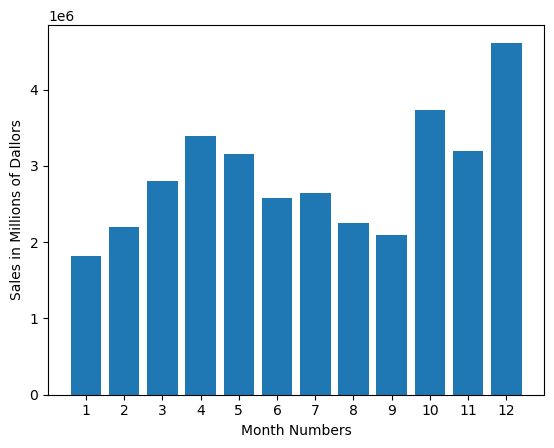

In [15]:
import matplotlib.pyplot as plt

plt.bar(by_month_total_sales_df["Month"], by_month_total_sales_df["Sales"])
plt.xticks(by_month_total_sales_df["Month"])
plt.ylabel("Sales in Millions of Dallors")
plt.xlabel("Month Numbers")
plt.show()